In [30]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np

print(tf.__version__)

2.2.0


## Load ResNet152 Model

In [31]:
res152_model = ResNet152(weights='imagenet')
res152_model.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

In [32]:
model = Model(inputs=res152_model.input, outputs=res152_model.get_layer('avg_pool').output)

In [33]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

conv4_block36_2_conv (Conv2D)   (None, 14, 14, 256)  590080      conv4_block36_1_relu[0][0]       
__________________________________________________________________________________________________
conv4_block36_2_bn (BatchNormal (None, 14, 14, 256)  1024        conv4_block36_2_conv[0][0]       
__________________________________________________________________________________________________
conv4_block36_2_relu (Activatio (None, 14, 14, 256)  0           conv4_block36_2_bn[0][0]         
__________________________________________________________________________________________________
conv4_block36_3_conv (Conv2D)   (None, 14, 14, 1024) 263168      conv4_block36_2_relu[0][0]       
__________________________________________________________________________________________________
conv4_block36_3_bn (BatchNormal (None, 14, 14, 1024) 4096        conv4_block36_3_conv[0][0]       
__________________________________________________________________________________________________
conv4_bloc

In [34]:
class_names = os.listdir("../feature/feature_fbank/")
class_names.sort()
   
forPrintList = [class_name.split('_')[1] for class_name in class_names]
print(forPrintList)

['kwakjuheon', 'kimjiho', 'songyejin', 'parksohui', 'moonyeonwoo', 'kangsubin', 'leekyeongeun', 'chochaeyeon', 'shindonghwan', 'kwakmirae', 'kimhyeryeong', 'chaeminjoon', 'kwakyiheon', 'leesumin', 'choihayoung', 'kangyeseo', 'kwakmihyang', 'eundano', 'limjinju', 'kwonyuna', 'kwoneunkyung', 'johaesu', 'leebyeongjin', 'hyeonsanghyeok', 'jennie', 'simseungmin', 'parksomi', 'yuminji', 'parksojin', 'kwonyeonwoo', 'ladakyeong', 'janghyomin', 'parkeunbi', 'parkdayeung', 'parkjongae', 'hansohee', 'janggyeoul', 'leewooju', 'nomyungok', 'heoyoonjung', 'heojaemin', 'kimsoyung', 'chuminha', 'kimhyeonsu', 'chaesonghwa', 'kwonyulim', 'kimminyoung', 'jueunhong', 'leejeongju', 'kimsubin', 'kimkihyeon', 'kimminji', 'myeongjaewon', 'kimjihyeon']


In [35]:
x_list = []
y_list = []
fname_list =[]
for i in range(0,len(class_names)):
    files=os.listdir("../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        fname_list.append("../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

### Convert Feature Numpy Array to PNG image

In [36]:
import imageio
import os
def npy_2_png (cname,fname):
    if not os.path.exists("../feature/feature_fbank_png/"):
        os.makedirs("../feature/feature_fbank_png/")
    if not os.path.exists("../feature/feature_fbank_png/"+cname) :
        os.makedirs("../feature/feature_fbank_png/"+cname)
    
    array = np.load("../feature/feature_fbank/"+cname+"/"+fname)
    
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0

    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../feature/feature_fbank_png/"+cname+"/{}.png".format(i)):
        os.remove("../feature/feature_fbank_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../feature/feature_fbank_png/"+cname+"/{}.png".format(i),array)
    return "../feature/feature_fbank_png/"+cname+"/{}.png".format(i)

In [37]:
X_TF = []
y_TF = []
for i,fname in zip(range(0,len(fname_list)), fname_list):
    print(i,fname)
    
    fbank = image.load_img(npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF.append(list(flatten[0]))
    y_TF.append(class_names.index(fname.split('/')[3]))

Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


1 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy
3 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


4 ../feature/feature_fbank/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_3.npy
6 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


7 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_2.npy
8 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_4.npy
9 ../feature/feature_fbank/2017019740002_kimjiho/2017019740002_kimjiho_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


10 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_2.npy
11 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_3.npy
12 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


13 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_1.npy
14 ../feature/feature_fbank/2017019740003_songyejin/2017019740003_songyejin_0.npy
15 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


16 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_1.npy
17 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_3.npy
18 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


19 ../feature/feature_fbank/2017019740004_parksohui/2017019740004_parksohui_4.npy
20 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_3.npy
21 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


22 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_0.npy
23 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_4.npy
24 ../feature/feature_fbank/2017019740005_moonyeonwoo/2017019740005_moonyeonwoo_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


25 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_3.npy
26 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_1.npy
27 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


28 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_2.npy
29 ../feature/feature_fbank/2017019740006_kangsubin/2017019740006_kangsubin_0.npy
30 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


31 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_4.npy
32 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_0.npy
33 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


34 ../feature/feature_fbank/2017019740007_leekyeongeun/2017019740007_leekyeongeun_1.npy
35 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_4.npy
36 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


37 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_2.npy
38 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_1.npy
39 ../feature/feature_fbank/2017019740008_chochaeyeon/2017019740008_chochaeyeon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


40 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_1.npy
41 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_2.npy
42 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


43 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_0.npy
44 ../feature/feature_fbank/2017019740009_shindonghwan/2017019740009_shindonghwan_3.npy
45 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


46 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_0.npy
47 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_1.npy
48 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


49 ../feature/feature_fbank/2017019740010_kwakmirae/2017019740010_kwakmirae_3.npy
50 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_1.npy
51 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


52 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_0.npy
53 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_4.npy
54 ../feature/feature_fbank/2017019740011_kimhyeryeong/2017019740011_kimhyeryeong_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


55 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_0.npy
56 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_4.npy
57 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


58 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_2.npy
59 ../feature/feature_fbank/2017019740012_chaeminjoon/2017019740012_chaeminjoon_3.npy
60 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


61 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_1.npy
62 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_4.npy
63 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


64 ../feature/feature_fbank/2017019740013_kwakyiheon/2017019740013_kwakyiheon_3.npy
65 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_0.npy
66 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


67 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_2.npy
68 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_1.npy
69 ../feature/feature_fbank/2017019740014_leesumin/2017019740014_leesumin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


70 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_3.npy
71 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_1.npy
72 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


73 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_2.npy
74 ../feature/feature_fbank/2017019740015_choihayoung/2017019740015_choihayoung_0.npy
75 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


76 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_3.npy
77 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_2.npy
78 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


79 ../feature/feature_fbank/2017019740016_kangyeseo/2017019740016_kangyeseo_1.npy
80 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_3.npy
81 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


82 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_1.npy
83 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_4.npy
84 ../feature/feature_fbank/2017019740017_kwakmihyang/2017019740017_kwakmihyang_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


85 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_0.npy
86 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_4.npy
87 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


88 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_3.npy
89 ../feature/feature_fbank/2017019740018_eundano/2017019740018_eundano_2.npy
90 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


91 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_3.npy
92 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_4.npy
93 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


94 ../feature/feature_fbank/2017019740019_limjinju/2017019740019_limjinju_0.npy
95 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_1.npy
96 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


97 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_3.npy
98 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_2.npy
99 ../feature/feature_fbank/2017019770001_kwonyuna/2017019770001_kwonyuna_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


100 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_3.npy
101 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_2.npy
102 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


103 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_1.npy
104 ../feature/feature_fbank/2017019770002_kwoneunkyung/2017019770002_kwoneunkyung_4.npy
105 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


106 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_0.npy
107 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_1.npy
108 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


109 ../feature/feature_fbank/2017019770003_johaesu/2017019770003_johaesu_3.npy
110 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_4.npy
111 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


112 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_0.npy
113 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_2.npy
114 ../feature/feature_fbank/2017019770004_leebyeongjin/2017019770004_leebyeongjin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


115 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_1.npy
116 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_2.npy
117 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


118 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_0.npy
119 ../feature/feature_fbank/2017019770005_hyeonsanghyeok/2017019770005_hyeonsanghyeok_3.npy
120 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


121 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_0.npy
122 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_1.npy
123 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


124 ../feature/feature_fbank/2017019770006_jennie/2017019770006_jennie_3.npy
125 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_3.npy
126 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


127 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_1.npy
128 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_4.npy
129 ../feature/feature_fbank/2017019770007_simseungmin/2017019770007_simseungmin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


130 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_2.npy
131 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_1.npy
132 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


133 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_0.npy
134 ../feature/feature_fbank/2017019770008_parksomi/2017019770008_parksomi_4.npy
135 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


136 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_4.npy
137 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_0.npy
138 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


139 ../feature/feature_fbank/2017019770009_yuminji/2017019770009_yuminji_2.npy
140 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_1.npy
141 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


142 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_0.npy
143 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_3.npy
144 ../feature/feature_fbank/2017019770010_parksojin/2017019770010_parksojin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


145 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_0.npy
146 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_2.npy
147 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


148 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_4.npy
149 ../feature/feature_fbank/2017019770011_kwonyeonwoo/2017019770011_kwonyeonwoo_1.npy
150 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


151 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_4.npy
152 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_3.npy
153 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


154 ../feature/feature_fbank/2017019770012_ladakyeong/2017019770012_ladakyeong_2.npy
155 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_2.npy
156 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


157 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_0.npy
158 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_1.npy
159 ../feature/feature_fbank/2017019770013_janghyomin/2017019770013_janghyomin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


160 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_3.npy
161 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_2.npy
162 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


163 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_1.npy
164 ../feature/feature_fbank/2017019770014_parkeunbi/2017019770014_parkeunbi_4.npy
165 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


166 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_2.npy
167 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_3.npy
168 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


169 ../feature/feature_fbank/2017019770015_parkdayeung/2017019770015_parkdayeung_0.npy
170 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_4.npy
171 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


172 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_3.npy
173 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_0.npy
174 ../feature/feature_fbank/2017019770016_parkjongae/2017019770016_parkjongae_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


175 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_3.npy
176 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_1.npy
177 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


178 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_2.npy
179 ../feature/feature_fbank/2017019770017_hansohee/2017019770017_hansohee_4.npy
180 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


181 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_3.npy
182 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_2.npy
183 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


184 ../feature/feature_fbank/2017019770018_janggyeoul/2017019770018_janggyeoul_0.npy
185 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_3.npy
186 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


187 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_1.npy
188 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_2.npy
189 ../feature/feature_fbank/2017019770019_leewooju/2017019770019_leewooju_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


190 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_4.npy
191 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_1.npy
192 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


193 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_2.npy
194 ../feature/feature_fbank/2017019770020_nomyungok/2017019770020_nomyungok_3.npy
195 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


196 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_2.npy
197 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_3.npy
198 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


199 ../feature/feature_fbank/2017019770021_heoyoonjung/2017019770021_heoyoonjung_0.npy
200 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_4.npy
201 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


202 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_2.npy
203 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_0.npy
204 ../feature/feature_fbank/2017019770022_heojaemin/2017019770022_heojaemin_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


205 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_4.npy
206 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_0.npy
207 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


208 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_2.npy
209 ../feature/feature_fbank/2017019770023_kimsoyung/2017019770023_kimsoyung_3.npy
210 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


211 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_4.npy
212 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_2.npy
213 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


214 ../feature/feature_fbank/2017019770024_chuminha/2017019770024_chuminha_1.npy
215 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_1.npy
216 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


217 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_4.npy
218 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_0.npy
219 ../feature/feature_fbank/2017019770025_kimhyeonsu/2017019770025_kimhyeonsu_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


220 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_2.npy
221 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_0.npy
222 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


223 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_4.npy
224 ../feature/feature_fbank/2017019770026_chaesonghwa/2017019770026_chaesonghwa_3.npy
225 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


226 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_3.npy
227 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_4.npy
228 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


229 ../feature/feature_fbank/2017019770027_kwonyulim/2017019770027_kwonyulim_0.npy
230 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_3.npy
231 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


232 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_4.npy
233 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_0.npy
234 ../feature/feature_fbank/2017019770028_kimminyoung/2017019770028_kimminyoung_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


235 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_4.npy
236 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_0.npy
237 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


238 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_1.npy
239 ../feature/feature_fbank/2017019770029_jueunhong/2017019770029_jueunhong_2.npy
240 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


241 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_0.npy
242 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_2.npy
243 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


244 ../feature/feature_fbank/2017019770030_leejeongju/2017019770030_leejeongju_3.npy
245 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_1.npy
246 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


247 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
248 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_0.npy
249 ../feature/feature_fbank/2017019880001_kimsubin/2017019880001_kimsubin_2.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


250 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_0.npy
251 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_3.npy
252 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


253 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_2.npy
254 ../feature/feature_fbank/2017019880002_kimkihyeon/2017019880002_kimkihyeon_1.npy
255 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


256 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_4.npy
257 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_2.npy
258 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


259 ../feature/feature_fbank/2017019880003_kimminji/2017019880003_kimminji_3.npy
260 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_2.npy
261 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


262 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_0.npy
263 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_4.npy
264 ../feature/feature_fbank/2017019880004_myeongjaewon/2017019880004_myeongjaewon_3.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


265 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_1.npy
266 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_0.npy
267 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_4.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


268 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_3.npy
269 ../feature/feature_fbank/2017019880005_kimjihyeon/2017019880005_kimjihyeon_2.npy


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

X_TF_train = np.array(X_TF)
y_TF_train = np.array(y_TF)

X_TF_train, X_TF_test, y_TF_train, y_TF_test = train_test_split(X_TF_train, y_TF_train, test_size=0.30, random_state=42, stratify=y_TF_train)

from tensorflow.keras.utils import to_categorical
y_TF_train_encoded = tf.keras.utils.to_categorical(y_TF_train)
y_TF_test_encoded = tf.keras.utils.to_categorical(y_TF_test)

X_TF_train_reshape = X_TF_train.reshape(-1, X_TF_train.shape[1], 1)
X_TF_test_reshape   = X_TF_test.reshape(-1, X_TF_test.shape[1], 1)

In [39]:
print(X_TF_train_reshape.shape)
print(X_TF_test_reshape.shape)

print(y_TF_train_encoded.shape)
print(y_TF_test_encoded.shape)

(189, 2048, 1)
(81, 2048, 1)
(189, 54)
(81, 54)


## Classifier Learninig 

#### Fully Connected Layer

In [40]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.layers import Dropout, LSTM, Embedding

model2 = tf.keras.Sequential()
model2.add(Conv1D(filters=1, kernel_size=1, padding='same', activation='relu',
                         input_shape=(X_TF_train_reshape.shape[1], 1)))
model2.add(MaxPooling1D(pool_size=4))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(y_TF_train_encoded.shape[1], activation="softmax"))

In [41]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2048, 1)           2         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 512, 1)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512, 1)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 54)                27702     
Total params: 27,704
Trainable params: 27,704
Non-trainable params: 0
_________________________________________________________________


In [42]:
model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [43]:
history = model2.fit(X_TF_train_reshape, y_TF_train_encoded, epochs=20, verbose=1,batch_size=4, validation_data=(X_TF_test_reshape, y_TF_test_encoded))

Epoch 1/20
48/48 [==============================] - 0s 3ms/step - loss: 4.2463 - accuracy: 0.0053 - val_loss: 3.9871 - val_accuracy: 0.0247
Epoch 2/20
48/48 [==============================] - 0s 2ms/step - loss: 3.9913 - accuracy: 0.0159 - val_loss: 3.9898 - val_accuracy: 0.0123
Epoch 3/20
48/48 [==============================] - 0s 2ms/step - loss: 3.9898 - accuracy: 0.0106 - val_loss: 3.9902 - val_accuracy: 0.0123
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 3.9896 - accuracy: 0.0106 - val_loss: 3.9906 - val_accuracy: 0.0123
Epoch 5/20
48/48 [==============================] - 0s 2ms/step - loss: 3.9894 - accuracy: 0.0000e+00 - val_loss: 3.9909 - val_accuracy: 0.0123
Epoch 6/20
48/48 [==============================] - 0s 4ms/step - loss: 3.9893 - accuracy: 0.0159 - val_loss: 3.9914 - val_accuracy: 0.0123
Epoch 7/20
48/48 [==============================] - 0s 2ms/step - loss: 3.9891 - accuracy: 0.0106 - val_loss: 3.9917 - val_accuracy: 0.0123
Epoch 8/20
48/48

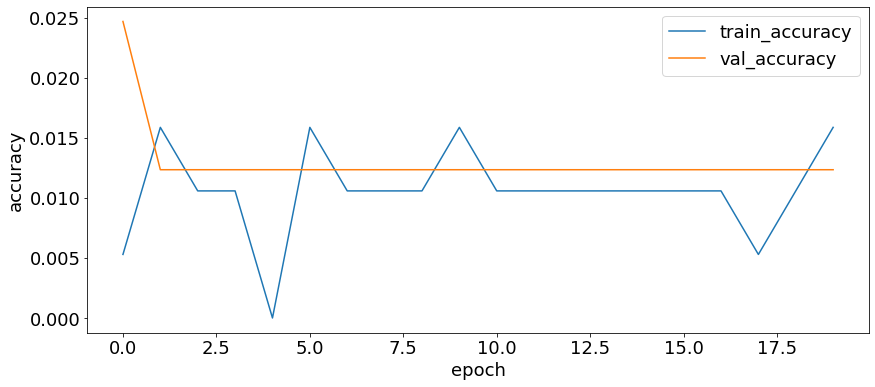

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [45]:
def val_npy_2_png (cname,fname):
    if not os.path.exists("../feature/feature_fbank_validation_png/"):
        os.makedirs("../feature/feature_fbank_validation_png/")
    if not os.path.exists("../feature/feature_fbank_validation_png/"+cname) :
        os.makedirs("../feature/feature_fbank_validation_png/"+cname)
    
    array = np.load("../feature/feature_fbank_validation/"+cname+"/"+fname)
    array = array - np.min(array)
    array = array / np.max(array)
    array = array * 255.0
    
    i = fname.split('_')[2].split('.')[0]
    if os.path.exists("../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)):
        os.remove("../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i))
        
    imageio.imwrite("../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i),array)
    return "../feature/feature_fbank_validation_png/"+cname+"/{}.png".format(i)

#### Linear SVM

In [46]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

predicted = clf.predict(X_TF_test)
print(X_TF_test.shape)

# get the accuracy
print (accuracy_score(y_TF_test, predicted))

(81, 2048)
0.9382716049382716


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [47]:
from sklearn.metrics import classification_report
target_names = [class_name.split('_')[1] for class_name in class_names]
print(classification_report(y_TF_test, predicted, target_names=target_names))

                precision    recall  f1-score   support

    kwakjuheon       1.00      0.50      0.67         2
       kimjiho       1.00      1.00      1.00         2
     songyejin       1.00      1.00      1.00         2
     parksohui       0.00      0.00      0.00         1
   moonyeonwoo       1.00      1.00      1.00         1
     kangsubin       1.00      1.00      1.00         1
  leekyeongeun       0.50      1.00      0.67         1
   chochaeyeon       1.00      1.00      1.00         2
  shindonghwan       1.00      1.00      1.00         1
     kwakmirae       1.00      1.00      1.00         1
  kimhyeryeong       1.00      1.00      1.00         2
   chaeminjoon       1.00      1.00      1.00         2
    kwakyiheon       0.50      1.00      0.67         1
      leesumin       1.00      1.00      1.00         1
   choihayoung       1.00      1.00      1.00         2
     kangyeseo       1.00      1.00      1.00         1
   kwakmihyang       1.00      1.00      1.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
y_TF_score = clf.fit(X_TF_train, y_TF_train).decision_function(X_TF_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [49]:
for i in range(0, len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_TF_test_encoded[:, i], y_TF_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_TF_test_encoded.ravel(), y_TF_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-50-23da46f30e65>:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


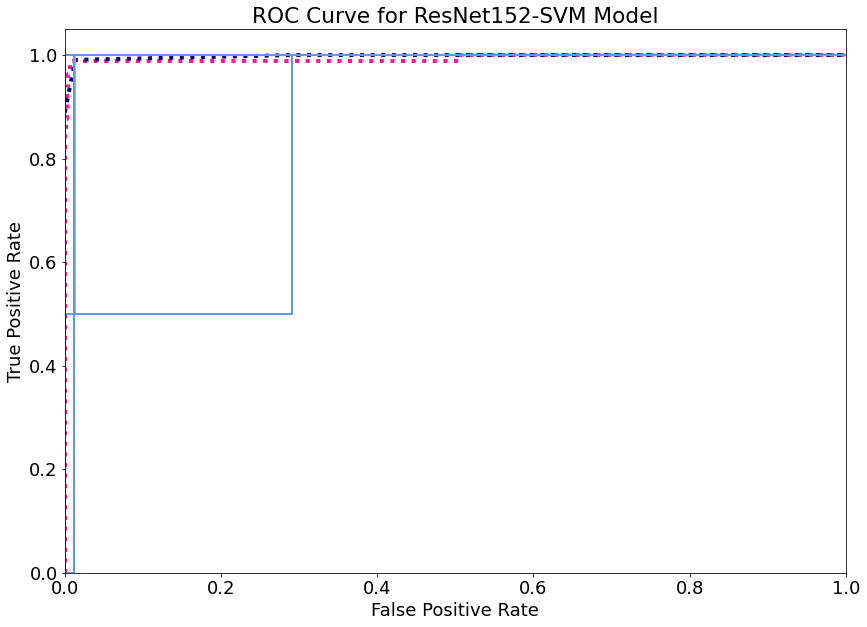

In [50]:
from scipy import interp
from itertools import cycle

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(0, len(class_names))]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(0, len(class_names)):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= len(class_names)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (14,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw =2
for i, color in zip(range(len(class_names)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ResNet152-SVM Model')
# plt.legend(loc="lower right")
plt.show()

In [51]:
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_TF_train, y_TF_train)

x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../feature/feature_fbank_validation/")
val_class_names.sort()
val_fname=[]

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../feature/feature_fbank_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]
    for j in range(0, len(val_files)):
        val_fname.append("../feature/feature_fbank_validation/"+val_class_names[i]+"/"+val_files[j])

X_TF_pred = []
y_TF_pred = []

for i,fname in zip(range(0,len(val_fname)), val_fname):
    print(i,fname)
    
    fbank = image.load_img(val_npy_2_png(fname.split('/')[3],fname.split('/')[4]), target_size=(224,224))
    tempX = image.img_to_array(fbank)
    tempX = np.expand_dims(tempX, axis=0)
    tempX = preprocess_input(tempX)
    
    flatten = model.predict(tempX)
    
    X_TF_pred.append(list(flatten[0]))
    y_TF_pred.append(val_class_names.index(fname.split('/')[3]))

    
X_TF_pred = np.array(X_TF_pred)
y_TF_pred = np.array(y_TF_pred)
y_TF_pred_encode = tf.keras.utils.to_categorical(y_TF_pred)

predicted = clf.predict(X_TF_pred)
real =[]
for i,pred in zip(range(0, len(predicted)), predicted) :
    print("Predict :",class_names[pred], ", Real :", val_class_names[y_TF_pred[i]])
    real.append(class_names.index(val_class_names[y_TF_pred[i]]))
# 
# get the accuracy
print (accuracy_score(real, predicted))

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


0 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_4.npy
1 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_1.npy
2 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


3 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_2.npy
4 ../feature/feature_fbank_validation/2017019740001_kwakjuheon/2017019740001_kwakjuheon_3.npy
5 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_1.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


6 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_4.npy
7 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_3.npy
8 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_0.npy


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


9 ../feature/feature_fbank_validation/2017019880001_kimsubin/2017019880001_kimsubin_2.npy
Predict : 2017019770027_kwonyulim , Real : 2017019740001_kwakjuheon
Predict : 2017019770023_kimsoyung , Real : 2017019740001_kwakjuheon
Predict : 2017019770001_kwonyuna , Real : 2017019740001_kwakjuheon
Predict : 2017019740001_kwakjuheon , Real : 2017019740001_kwakjuheon
Predict : 2017019770018_janggyeoul , Real : 2017019740001_kwakjuheon
Predict : 2017019770026_chaesonghwa , Real : 2017019880001_kimsubin
Predict : 2017019740015_choihayoung , Real : 2017019880001_kimsubin
Predict : 2017019740015_choihayoung , Real : 2017019880001_kimsubin
Predict : 2017019880005_kimjihyeon , Real : 2017019880001_kimsubin
Predict : 2017019740015_choihayoung , Real : 2017019880001_kimsubin
0.1


### Global Average Pooling

### Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_TF_train, y_TF_train)

GradientBoostingClassifier(random_state=0)

In [27]:
predicted_gb = gbrt.predict(X_TF_test)
print(X_TF_test.shape)

# get the accuracy
print (accuracy_score(y_TF_test, predicted_gb))

(81, 2048)
0.345679012345679


In [29]:
!cp train_FBANK_ResNet-152.ipynb train_FBANK_ResNet-101.ipynb